<a href="https://colab.research.google.com/github/minhong1126/data_analysis/blob/main/Relative_clause(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Relative Clause in Newspapers**



참고자료: 

*Kyungyul Kim, A Cognitive-Functional Account for Relative Clauses in Discourse, 『영어영문학 연구』 제 53권 2호(2011. 6): 15-31*


데이터를 활용한 영어담화 분석(Data-based English Discourse Analysis) 











1. 기존 자료
2. 웹크롤링 (구글 뉴스)
3. 자료 비교
4. Relative Pronoun, Type, Human -> Position 구분
5. 그 외

관계 대명사: 두 문장을 이을 때, 앞에 있는 명사를 대신하며 뒤에 오는 절을 선행사에 연결하는 대명사.


ex)

 (1). I have a pen **which** was my birthday present.
  
  : 주어를 대신하므로 position은 S, 펜의 의미를 제한하고 있어 RRC.

  (2). I have a pen, **which** was my birthday present.

 : 주어를 대신하므로 position은 S, 펜에 추가적인 의미를 더해 NRRC.

  - 앞에 , 이 붙고 뒷 문장이 완전하지 않을 경우 NRRC라고 취급했습니다.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 기존 자료

  (1) RRC(Restrictive Relative Clause, 제한적 용법) NRRC(Non-Restrictive Relative Clause, 계속적 용법)

  (2) Position 별 관계대명사 (역할)
    
    `(자료에 토큰 수만 나와있어 따로 Data Frame을 만들어 가시화했습니다.)`

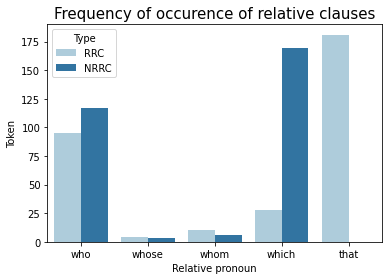

In [52]:
  ##(1). RRC와 NRRC: 관계대명사 별 RRC와 NNRC 빈도수
  ##*Table 1.Frequency of occurence of relative clauses, 19P*
  
sns.set_palette("Paired")
given_meaning = pd.DataFrame({
    'Token': [95, 117, 4, 3, 10, 6, 28, 169, 181, 0],
    'Type': ['RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC', 'RRC', 'NRRC']},
    index = ['who', 'who', 'whose', 'whose', 'whom', 'whom', 'which', 'which', 'that', 'that']
)

sns.barplot(x = given_meaning.index, y = 'Token', hue = 'Type', data = given_meaning)
plt.title('Frequency of occurence of relative clauses', fontsize = 15)
plt.xlabel('Relative pronoun', fontsize = 10)
plt.show()

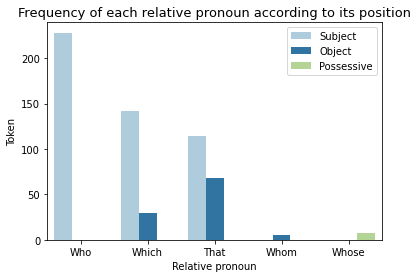

In [54]:
##(2). Position 별 관계 대명사
## *Table 3. Frequency of each relative pronoun according to its position, 20P*

given_pos = {
    'Position': ['Subject', 'Subject', 'Subject', 'Object', 'Object', 'Object', 'Possessive'],
    'Token': [228, 142, 114, 5, 30, 68, 7],
    'Type': ['Who', 'Which', 'That', 'Whom', 'Which', 'That', 'Whose']
}

sns.barplot(x = 'Type', y = 'Token', hue = 'Position', data = given_pos)
plt.title('Frequency of each relative pronoun according to its position', fontsize = 13)
plt.xlabel('Relative pronoun', fontsize = 10)
plt.ylabel('Token', fontsize = 10)
plt.show()

2. 웹크롤링 (구글 뉴스)

  (1) 사이트 가져오기

  (2) 링크와 기사 제목 가져오기




In [55]:
from bs4 import BeautifulSoup as bs
import requests

In [56]:
#(1) 사이트 가져오기
url = requests.get("https://news.google.com/topstories?hl=en-US&gl=US&ceid=US:en")  ##미국 구글 뉴스
soup = bs(url.content, 'html.parser')

In [6]:
#(2) 링크 가져오기
#자료 분류는 2021.12.07일 기준

title = soup.select("a href")

titles = [] ##제목
links = []  ##주소

for link in soup.select('h3 a'):  
    href = 'https://news.google.com' + link.get('href')[1:]
    title = link.string
    titles.append(title)
    links.append(href)

for link in soup.select('h4 a'):
    href = 'https://news.google.com' + link.get('href')[1:]
    title = link.string
    titles.append(title)
    links.append(href)

df = {'title': titles, 'link': links}
news_link = pd.DataFrame(df, columns=['title', 'link'])
news_link

,title,link
0,Schumer vows vote on Build Back Better legisla...,https://news.google.com/articles/CAIiEALuuIIBK...
1,Moderna says Covid booster effective against o...,https://news.google.com/articles/CBMidGh0dHBzO...
2,Sens. Warren and Booker test positive for brea...,https://news.google.com/articles/CBMiM2h0dHBzO...
3,"Leftist Gabriel Boric, 35, wins Chile's presid...",https://news.google.com/articles/CAIiEJldlSGJe...
4,Manchin's media critics predict Build Back Bet...,https://news.google.com/articles/CAIiELxY4TYmT...
5,Typhoon deaths in Philippines top 140; mayors ...,https://news.google.com/articles/CBMibGh0dHBzO...
6,Manchin says he won't vote for Build Back Bett...,https://news.google.com/articles/CAIiEP1_kcnlL...
7,UPDATE 8-Manchin delivers potential fatal blow...,https://news.google.com/articles/CBMiRmh0dHBzO...
8,Joe Manchin Rescues the Democrats,https://news.google.com/articles/CBMicmh0dHBzO...
9,Manchin kills Build Back Better and gives nati...,https://news.google.com/articles/CAIiEL9BTRHWT...


In [ ]:
# (3) 자료 분류 및 업로드
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
newdf = pd.read_excel('/content/drive/MyDrive/관계대명사.xlsx')
newdf

,index,article,sentence,relative pronoun,human,position,type,none,site
0,1,0,We have been preparing a range of economic san...,that,X,S,RRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
1,2,0,The officials said final decisions hadn't been...,whom,O,O,NRRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
2,3,0,The leaders on the call -- which included Fren...,which,X,S,NRRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
3,4,0,He would call for specific agreements that wou...,that,X,S,RRC,NaN,https://news.google.com/articles/CBMiS2h0dHBzO...
4,5,1,But so far there have not been an increase in ...,who,O,S,RRC,NaN,https://news.google.com/articles/CBMifGh0dHBzO...
...,...,...,...,...,...,...,...,...,...
314,315,48,"incredible, and it’s something that I personal...",that,X,O,RRC,NaN,https://news.google.com/articles/CBMibGh0dHBzO...
315,316,48,"As in, the hate video that is the first thing ...",that,X,S,RRC,NaN,https://news.google.com/articles/CBMibGh0dHBzO...
316,317,49,NaN,NaN,NaN,NaN,NaN,X,https://news.google.com/articles/CBMibGh0dHBzO...
317,318,50,NaN,NaN,NaN,NaN,NaN,X,https://news.google.com/articles/CBMiTGh0dHBzO...


In [58]:
newdf = newdf.dropna(subset = ['sentence'], axis = 0) ##NaN 값 제거
newdf= newdf.drop(['index'], axis = 1)  ##불필요한 값 제거
newdf = newdf.drop(['none'], axis = 1) 
newdf

,article,sentence,relative pronoun,human,position,type,site
0,0,We have been preparing a range of economic san...,that,X,S,RRC,https://news.google.com/articles/CBMiS2h0dHBzO...
1,0,The officials said final decisions hadn't been...,whom,O,O,NRRC,https://news.google.com/articles/CBMiS2h0dHBzO...
2,0,The leaders on the call -- which included Fren...,which,X,S,NRRC,https://news.google.com/articles/CBMiS2h0dHBzO...
3,0,He would call for specific agreements that wou...,that,X,S,RRC,https://news.google.com/articles/CBMiS2h0dHBzO...
4,1,But so far there have not been an increase in ...,who,O,S,RRC,https://news.google.com/articles/CBMifGh0dHBzO...
...,...,...,...,...,...,...,...
311,48,I’m gonna try not to get worked up in this vid...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
312,48,Let me draw this exact same thing for you exce...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
313,48,but this situation was more serious—the metic...,that,X,S,RRC,https://news.google.com/articles/CBMibGh0dHBzO...
314,48,"incredible, and it’s something that I personal...",that,X,O,RRC,https://news.google.com/articles/CBMibGh0dHBzO...


In [ ]:
article = newdf['article'].nunique()  ##기사 개수
rel = newdf['relative pronoun'].value_counts()  ##관계대명사 별 개수
mean = str(newdf['relative pronoun'].value_counts().mean()) ##관계대명사 개수 평균
human = newdf['human'].value_counts() ##human 개수


print("Total article: " + str(article) + "\n")
print("Token:")
print(rel)
print("\n")
print("Relative pronoun Mean: " + mean + "\n")
print("Human: ")
print(human)

Total article: 32

Token:
that     118
who       87
which     86
whom       4
whose      4
Name: relative pronoun, dtype: int64


Relative pronoun Mean: 59.8

Human: 
X    204
O     95
Name: human, dtype: int64


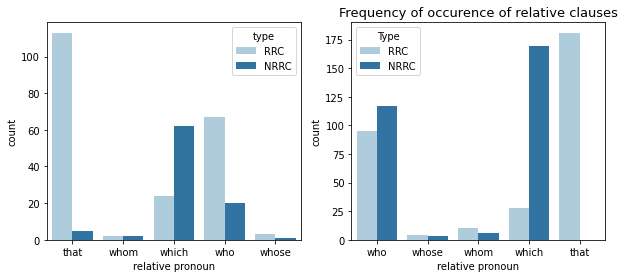

In [59]:
## 3. 자료 비교
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = 'relative pronoun', hue = 'type', data = newdf, ax= ax[0]) ##새 자료
plt.title('Frequency of occurence of relative clauses', fontsize = 13)
plt.legend(labels=['RRC', 'NRRC'])

sns.barplot(x = given_meaning.index, y = 'Token', hue = 'Type', data = given_meaning, ax = ax[1]) ##기존 자료
plt.xlabel('relative pronoun', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

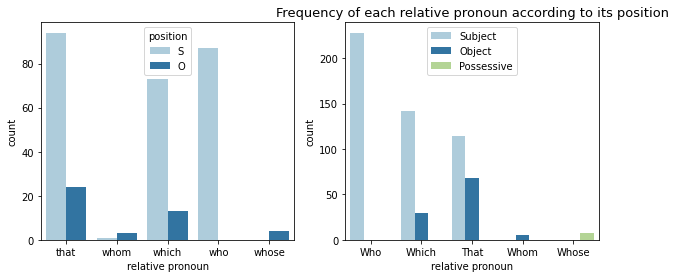

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x = newdf['relative pronoun'], hue = 'position', data = newdf, ax= ax[0]) ##새 자료
plt.title('Frequency of each relative pronoun according to its position', fontsize = 13)

sns.barplot(x = 'Type', y = 'Token', hue = 'Position', data = given_pos, ax = ax[1])  ##기존 자료
plt.xlabel('relative pronoun', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

4. Relative Pronoun, Type, Human에 따라 Positon 구분할 때의 정확도

 (1). LabelEncoder로 인코딩

 (2). BernoulliNB, GaussianNB로 구분

In [63]:
## 4. Relative Pronoun, Type, Human -> Position 구분
from sklearn.preprocessing import LabelEncoder

mdf = pd.DataFrame({'type': {}, 'relative pronoun': {}, 'human': {}, 'position': {}}) ##인코딩
mdf['relative pronoun'] = LabelEncoder().fit_transform(newdf['relative pronoun'])
mdf['human'] = LabelEncoder().fit_transform(newdf.human)
mdf['type'] = LabelEncoder().fit_transform(newdf['type'])
mdf['position'] = LabelEncoder().fit_transform(newdf.position)

mdf

,type,relative pronoun,human,position
0,1,0,1,1
1,0,3,0,0
2,0,1,1,1
3,1,0,1,1
4,1,2,0,1
...,...,...,...,...
294,1,0,1,1
295,1,0,1,1
296,1,0,1,1
297,1,0,1,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB

X = mdf.drop(['position'], axis = 1)
y = mdf['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1126)

Bmodel = BernoulliNB()  ##BernoulliNB 사용
Bmodel.fit(X_train,y_train)
predict = Bmodel.predict(X_test)

Gmodel = GaussianNB() ##GaussianNB 사용
Gmodel.fit(X_train,y_train)
predict = Gmodel.predict(X_test)

print("BernoulliNB(train, test): \n")
train_score = Bmodel.score(X_train, y_train)
test_score = Bmodel.score(X_test, y_test)
display(train_score, test_score)

print("\nGaussianNB(train, test): \n")
train_score = Gmodel.score(X_train, y_train)
test_score = Gmodel.score(X_test, y_test)
display(train_score, test_score)

BernoulliNB(train, test): 



0.8577405857740585

0.8333333333333334


GaussianNB(train, test): 



0.8619246861924686

0.8333333333333334

5 - 1. 뉴스 제목에서 가장 많이 나온 단어

  (1). 제목을 문장 - 단어 순으로 나누기

  (2). 중요하지 않은 단어, 특수기호 제외
   - WordNetLemmatizer로 표제어 추출을 하려 했으나 RAM 초과

(3). 몇 번 나온 단어가 가장 많은지 가시화

  (4). 워드 클라우드 제작

In [65]:
## titles에서 가장 많이 나온 단어
## Reference: https://dschloe.github.io/python/nlp/ch01_text_mining/
## 2021. 12. 20. 구글 뉴스 기준
import nltk
import re

from nltk import word_tokenize
from nltk import sent_tokenize

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
word_list = []
for i in titles:
  word  = sent_tokenize(str(i))  ##문장으로 나누기
  for j in word:
    word_list.append(word_tokenize(str(word)))  ##단어로 나누기

print(word_list)

[['[', '``', 'Schumer', 'vows', 'vote', 'on', 'Build', 'Back', 'Better', 'legislation', 'despite', 'Manchin', "'s", 'opposition', "''", ']'], ['[', "'Moderna", 'says', 'Covid', 'booster', 'effective', 'against', 'omicron', ',', 'but', 'will', 'still', 'develop', 'new', 'shot', "'", ']'], ['[', "'Sens", '.', "'", ',', "'Warren", 'and', 'Booker', 'test', 'positive', 'for', 'breakthrough', 'COVID', "'", ']'], ['[', "'Sens", '.', "'", ',', "'Warren", 'and', 'Booker', 'test', 'positive', 'for', 'breakthrough', 'COVID', "'", ']'], ['[', '``', 'Leftist', 'Gabriel', 'Boric', ',', '35', ',', 'wins', 'Chile', "'s", 'presidential', 'election', "''", ']'], ['[', '``', 'Manchin', "'s", 'media', 'critics', 'predict', 'Build', 'Back', 'Better', "'no", "'", 'vote', 'is', 'threat', 'to', 'the', "'future", 'of', 'American', 'democracy', "'", "''", ']'], ['[', "'Typhoon", 'deaths', 'in', 'Philippines', 'top', '140', ';', 'mayors', 'plead', 'for', 'food', "'", ']'], ['[', '``', 'Manchin', 'says', 'he', 'w

In [67]:
## 중요하지 않은 단어(the, a 등) 나 특수기호 빼기
stopwords = nltk.corpus.stopwords.words("english")
filtered_word = []

for i in word_list:
  for word in i:
    word = word.lower()
    if word not in stopwords and len(word) > 3:
      filtered_word.append(word)

filtered_word = re.sub(r'[^\w]', ' ', str(filtered_word))
filtered_word = (',').join(filtered_word.split())
filtered_word = filtered_word.split(',')

print(filtered_word)

['schumer', 'vows', 'vote', 'build', 'back', 'better', 'legislation', 'despite', 'manchin', 'opposition', 'moderna', 'says', 'covid', 'booster', 'effective', 'omicron', 'still', 'develop', 'shot', 'sens', 'warren', 'booker', 'test', 'positive', 'breakthrough', 'covid', 'sens', 'warren', 'booker', 'test', 'positive', 'breakthrough', 'covid', 'leftist', 'gabriel', 'boric', 'wins', 'chile', 'presidential', 'election', 'manchin', 'media', 'critics', 'predict', 'build', 'back', 'better', 'vote', 'threat', 'future', 'american', 'democracy', 'typhoon', 'deaths', 'philippines', 'mayors', 'plead', 'food', 'manchin', 'says', 'vote', 'build', 'back', 'better', 'update', '8', 'manchin', 'delivers', 'potential', 'fatal', 'blow', 'biden', '1', '75', 'trillion', 'spending', 'bill', 'joe', 'manchin', 'rescues', 'democrats', 'manchin', 'kills', 'build', 'back', 'better', 'gives', 'nation', 'republicans', 'moderna', 'booster', 'shot', 'increases', 'antibody', 'levels', 'omicron', 'company', 'says', 'mod

In [70]:
from collections import Counter

count = list(Counter(filtered_word).most_common())  ##단어 별로 몇 번 나왔는지 나열
common = list(Counter(filtered_word).most_common(30)) ##가장 많이 나온 단어 30개
count

[('covid', 11),
 ('manchin', 10),
 ('says', 8),
 ('build', 7),
 ('back', 7),
 ('better', 7),
 ('positive', 6),
 ('moderna', 5),
 ('booster', 5),
 ('omicron', 5),
 ('typhoon', 5),
 ('philippines', 5),
 ('19', 5),
 ('year', 5),
 ('warren', 4),
 ('booker', 4),
 ('breakthrough', 4),
 ('leftist', 4),
 ('chile', 4),
 ('democracy', 4),
 ('vote', 3),
 ('test', 3),
 ('boric', 3),
 ('election', 3),
 ('media', 3),
 ('increases', 3),
 ('sen', 3),
 ('tests', 3),
 ('death', 3),
 ('toll', 3),
 ('people', 3),
 ('fauci', 3),
 ('vaccines', 3),
 ('inflation', 3),
 ('the', 3),
 ('vows', 2),
 ('legislation', 2),
 ('shot', 2),
 ('sens', 2),
 ('gabriel', 2),
 ('wins', 2),
 ('critics', 2),
 ('predict', 2),
 ('american', 2),
 ('deaths', 2),
 ('potential', 2),
 ('blow', 2),
 ('biden', 2),
 ('bill', 2),
 ('joe', 2),
 ('democrats', 2),
 ('antibody', 2),
 ('levels', 2),
 ('significantly', 2),
 ('antibodies', 2),
 ('millennial', 2),
 ('next', 2),
 ('voting', 2),
 ('rights', 2),
 ('super', 2),
 ('climbs', 2),
 ('lea

Text(0, 0.5, 'Total')

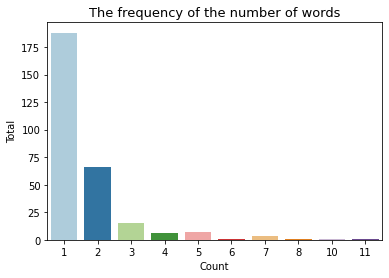

In [71]:
count_num = []
for i in count:
  count_num.append(i[1])  ## 나온 숫자만 가져오기

count_num = list(Counter(count_num).most_common())  ## 몇 번이 가장 많은지 나열

Count = []
Total = []
for i in count_num:
  Count.append(i[0])
  Total.append(i[1])

sns.barplot(x = Count, y = Total) ## 몇 번 나온 단어들이 가장 많은지
plt.title('The frequency of the number of words', fontsize = 13)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Total', fontsize = 10)

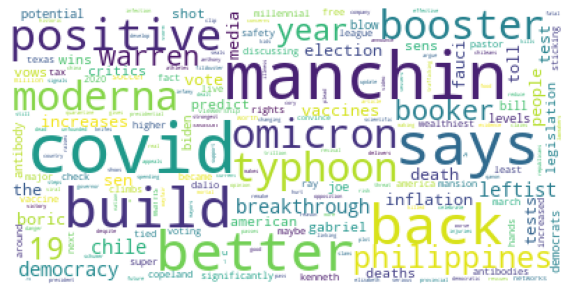

In [72]:
from wordcloud import WordCloud ##워드 클라우드

wc = WordCloud(background_color = "white", max_font_size = 50)
cloud = wc.generate_from_frequencies(dict(count))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

5 - 2. 다른 자료

  (1). 연도, 개월 별 뉴스 개수

  (2). 뉴스 제목에서의 관계대명사 개수

In [73]:
## 다른 자료 (headline_text, 출저: https://www.kaggle.com/therohk/million-headlines)
head = pd.read_csv('/content/drive/MyDrive/abcnews-date-text.csv', parse_dates=['publish_date'])
head

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [75]:
## 연도별 기사 개수
date = pd.DataFrame(head['publish_date'].value_counts())
date = date.rename_axis('Date')
date = date.rename(columns={'publish_date':'count'})
date = date.sort_values('Date')

date  ##날짜 별로 출력

,count
Date,
2003-02-19,198
2003-02-20,250
2003-02-21,250
2003-02-22,126
2003-02-23,136
...,...
2020-12-27,50
2020-12-28,64
2020-12-29,84


Text(0, 0.5, 'count')

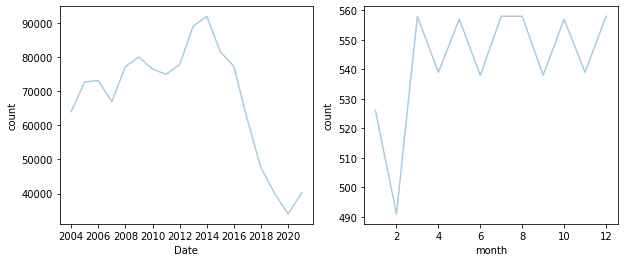

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

year = date.resample("1Y").sum()  ##1년 단위로 resample
sns.lineplot(x = year.index, y = year['count'], ax = ax[0]) ##년도 별 개수

month = pd.DataFrame(date.index.month.value_counts())
month = month.rename_axis('month').reset_index()
month = month.sort_values('month')
month = month.set_index('month')

sns.lineplot(x = month.index, y = month['Date'], ax = ax[1])  ##월 별 개수
plt.ylabel('count', fontsize = 10)

전체 중의 비율: 0.003803441037693536


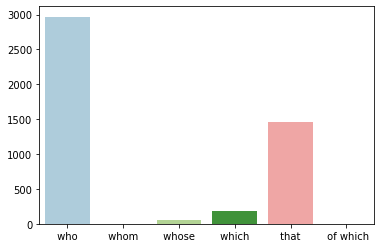

In [78]:
rel = [' who ', ' whom ', ' whose ', ' which ', ' that ', ' of which']
num = []
for i in rel:
  num.append(len(head[head['headline_text'].str.contains(i)]))  ##관계 대명사를 포함하는 기사 개수 세기

sns.barplot(x = rel, y = num)

print("전체 중의 비율: " + str(sum(num) / len(head)))